Ejercicios Planteados
Es sabido que, una entidad que presta servicios o productos (pudiera ser una empresa, un banco, una tienda, etcétera) puede mejorar la experiencia de cliente desarrollando productos personalizados en pos de las preferencias y necesidades de cada uno de sus clientes.
El  set  de  datos potencial contiene  datos  sobre  clientes  de  una  institución financiera:
●         Customer ID: ID asociado al cliente
●         Age: Edad en años del cliente
●         Income: Ingreso anual del cliente
●         Family: Tamaño del grupo familiar del cliente
●         CCAvg: Cupo promedio mensual utilizado en tarjetas de crédito
●         Education: Nivel educacional (1 si no es graduado, 2 graduado y 3 si posee estudios especializadoss (magister, doctorado, etcétera)
●         Mortgage: Monto de la hipoteca (0 indica que no posee)
●         ZIP Code: Código postal del domicilio
En la última campaña a cada cliente se le ofreció un producto personalizado en base  a  su  comportamiento  financiero,  preferencias,  capacidad  de  pago  y necesidades. La variable target corresponde a Personal Loan el cual indica si el cliente tomó o no tomó este producto (¿El cliente aceptó o no el producto ofrecido?), donde 0 indica que el cliente no adquirió el producto y 1 indica que sí lo adquirió.

Es de interés analizar cuáles pudieran ser los perfiles de clientes que tienen mayor probabilidad de aceptar el producto ofrecido, de manera de, identificar a los clientes con dichas características y priorizarlos a ellos en las próximas campañas.
a) Cargue el set de datos utilizando la función read.excel de pandas. ¿Qué columnas le hacen sentido incluir en un modelo para predecir si un cliente tomará o no el producto ofrecido? Si desea eliminar alguna columna, recuerde que puede usar la función drop('nombre columna a eliminar', axis=1).

   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


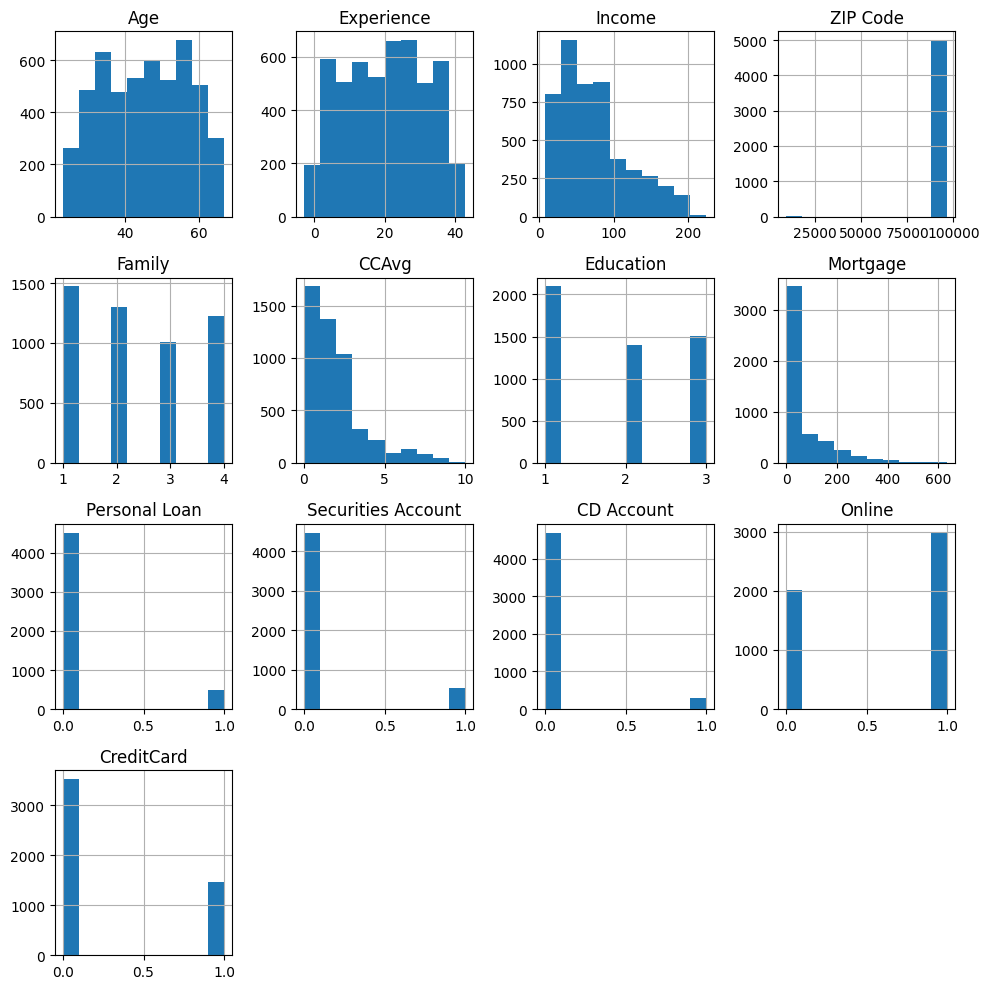

In [34]:
# Importamos Pandas
import pandas as pd
#importar matplotlib.pyplot
import matplotlib.pyplot as plt

#creamos la ruta de Model_creditoPersonal.csv
ruta_credito_personal = './datos/Model_creditoPersonal.csv'


#leemos el archivo Model_creditoPersonal.csv
credito_personal = pd.read_csv(ruta_credito_personal)

# Eliminar la columna 'ID' no se encuentra necesaria
credito_personal = credito_personal.drop('ID', axis=1)

# Mostrar los primeros datos del DataFrame después de eliminar la columna
print(credito_personal.head())

# 4. Visualizar la distribución de las columnas numéricas
credito_personal.hist(figsize=(10,10))
plt.tight_layout()
plt.show()



In [44]:
#Renombramos las columnas que tienen nombres compuestos por espacios por nombres compuestos por guiones bajos
credito_personal.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"Personal_Loan","Securities Account":"Securities_Account","CD Account":'CD_Account'},inplace=True)

#mostramos los nombres de las columnas
credito_personal.columns

columnas_a_cambiar = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education']

for columna in columnas_a_cambiar:
    credito_personal[columna] = credito_personal[columna].astype('category')

# Crear variables dummies para la columna 'Education'
credito_personal_dummies = pd.get_dummies(credito_personal, columns=['Education'])

# Convertir las columnas 'Education_1', 'Education_2' y 'Education_3' a enteros
credito_personal_dummies['Education_1'] = credito_personal_dummies['Education_1'].astype(int)
credito_personal_dummies['Education_2'] = credito_personal_dummies['Education_2'].astype(int)
credito_personal_dummies['Education_3'] = credito_personal_dummies['Education_3'].astype(int)

# Renombrar las columnas 'Education_1', 'Education_2' y 'Education_3'
credito_personal_dummies.rename(columns={'Education_1': 'No_Graduado', 'Education_2': 'Graduado', 'Education_3': 'Estudios_Especializados'}, inplace=True)

# Mostrar los primeros datos del DataFrame después de renombrar las columnas
print(credito_personal_dummies.head())




   Age  Experience  Income  ZIPCode  Family  CCAvg  Mortgage Personal_Loan  \
0   25           1      49    91107       4    1.6         0             0   
1   45          19      34    90089       3    1.5         0             0   
2   39          15      11    94720       1    1.0         0             0   
3   35           9     100    94112       1    2.7         0             0   
4   35           8      45    91330       4    1.0         0             0   

  Securities_Account CD_Account Online CreditCard  No_Graduado  Graduado  \
0                  1          0      0          0            1         0   
1                  1          0      0          0            1         0   
2                  0          0      0          0            1         0   
3                  0          0      0          0            0         1   
4                  0          0      0          1            0         1   

   Estudios_Especializados  
0                        0  
1               

In [45]:
print(credito_personal_dummies.head())

#mostrar las columnas
#print(credito_personal.columns)

   Age  Experience  Income  ZIPCode  Family  CCAvg  Mortgage Personal_Loan  \
0   25           1      49    91107       4    1.6         0             0   
1   45          19      34    90089       3    1.5         0             0   
2   39          15      11    94720       1    1.0         0             0   
3   35           9     100    94112       1    2.7         0             0   
4   35           8      45    91330       4    1.0         0             0   

  Securities_Account CD_Account Online CreditCard  No_Graduado  Graduado  \
0                  1          0      0          0            1         0   
1                  1          0      0          0            1         0   
2                  0          0      0          0            1         0   
3                  0          0      0          0            0         1   
4                  0          0      0          1            0         1   

   Estudios_Especializados  
0                        0  
1               

c) Defina en un objeto X las variables predictoras y en Y la variable respuesta Personal Loan. Obtenga los set de entrenamiento y prueba en una proporción 5:1. Recuerde que la función train_test_split() es útil para realizar split simple, además  fije  una  semilla  2021  (random_state=2021  en  la  función train_test_split())

In [46]:
from sklearn.model_selection import train_test_split

# Definir las variables predictoras (X) y la variable respuesta (Y)
X = credito_personal_dummies.drop('Personal_Loan', axis=1)
Y = credito_personal_dummies['Personal_Loan']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2021)

# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (4000, 14)
Y_train shape:  (4000,)
X_test shape:  (1000, 14)
Y_test shape:  (1000,)


d) Obtenga un árbol de decisión con el set de datos de entrenamiento. Obtenga el  MSE  del  modelo  en  el  set  de  prueba.  Muestre  el  árbol  obtenido,  ¿qué observa? ¿cuáles podrían ser los problemas de este árbol? ¿qué alternativas pudieran probarse para abordar este problema

MSE:  0.02


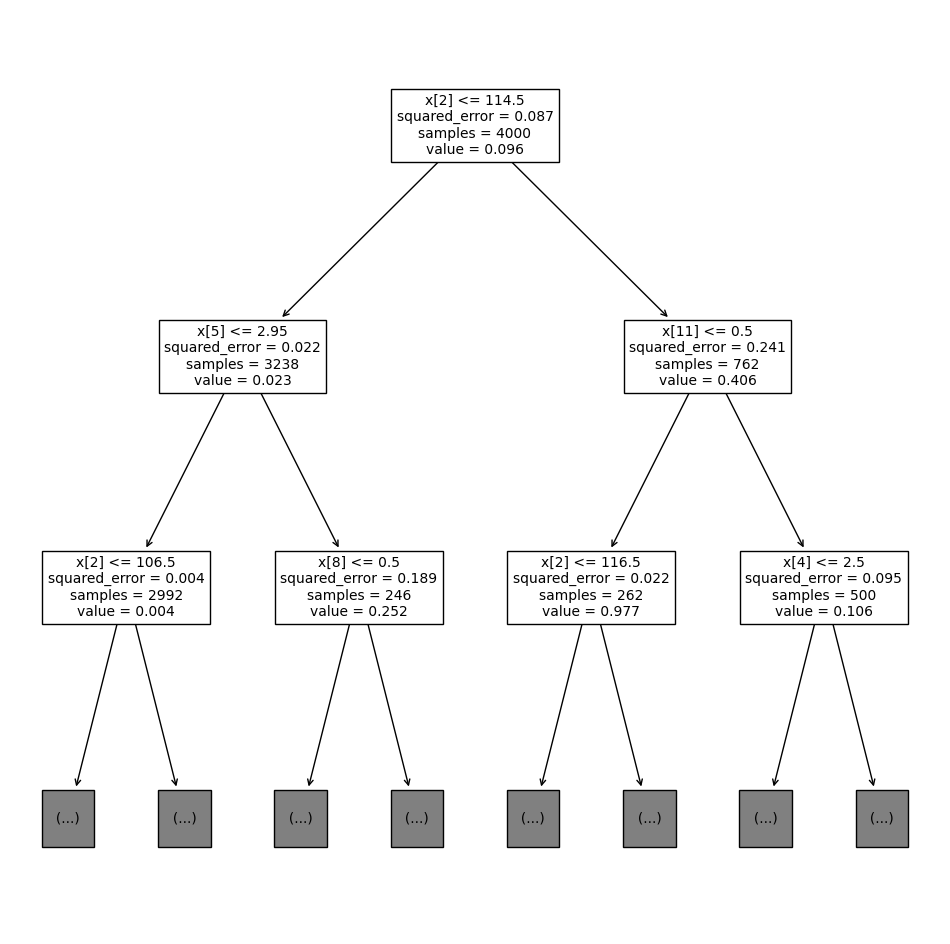

In [60]:



from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

# Crear y entrenar el árbol de decisión
arbol = DecisionTreeRegressor(random_state=2021)
arbol.fit(X_train, Y_train)

# Predecir los valores para el conjunto de prueba
Y_pred = arbol.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE: ", mse)

# Mostrar el árbol
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(arbol, max_depth=2, fontsize=10, ax=ax)
plt.show()






Las divisiones se basan en los valores de las características y las hojas contienen las predicciones. A medida que aumenta la profundidad del árbol, se captura más complejidad en los datos, pero también existe un mayor riesgo de sobreajuste.

Se podría:

Ajustar la Profundidad: Experimentar con diferentes profundidades para encontrar un equilibrio entre complejidad y generalización.

Ensemble Methods: Considerar métodos como Random Forest o Gradient Boosting para mejorar la precisión y la robustez.

Optimización de Hiperparámetros: Ajustar los hiperparámetros del árbol para encontrar la mejor configuración.

e) Plantee otro árbol de decisión pero definiendo como parámetro de control o prepoda la  profundidad  máxima  del  árbol,  para  esto  en  la  función DecisionTreeClassifier()  añada  como  argumento  max_depth=2  (profundidad máxima 2). Obtenga el MSE en el set de prueba y compare con el modelo anterior. Observe el árbol obtenido. Comente

MSE con profundidad 2:  0.011921239633348148


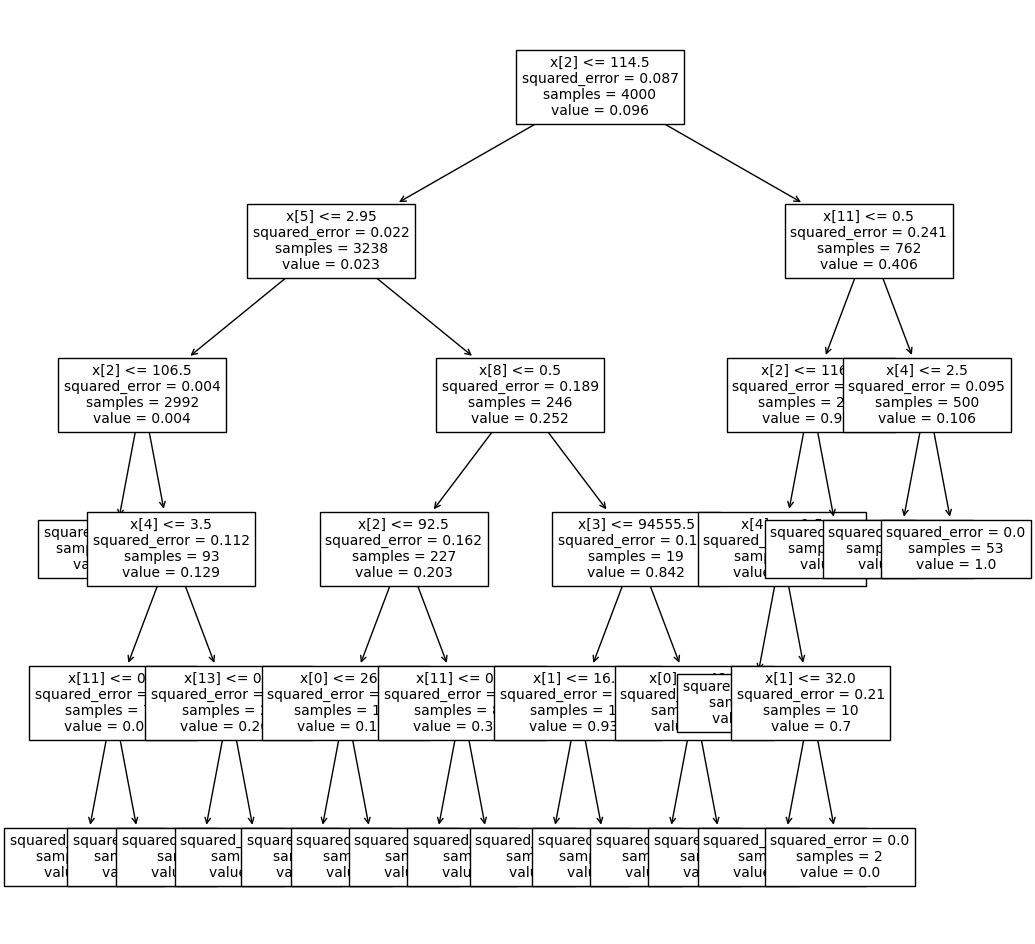

In [61]:
# Crear y entrenar el árbol de decisión con profundidad máxima 2
arbol_profundidad_2 = DecisionTreeRegressor(max_depth=2, random_state=2021)
arbol_profundidad_2.fit(X_train, Y_train)

# Predecir los valores para el conjunto de prueba
Y_pred_profundidad_2 = arbol_profundidad_2.predict(X_test)

# Calcular el MSE
mse_profundidad_2 = mean_squared_error(Y_test, Y_pred_profundidad_2)
print("MSE con profundidad 2: ", mse_profundidad_2)

# Mostrar el árbol
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(arbol_profundidad_2, fontsize=10, ax=ax)
plt.show()

 Observamos que el árbol tiene una profundidad máxima de 2 niveles. Las divisiones se basan en los valores de las características y las hojas contienen las predicciones.
 
Problemas Potenciales:

Sobreajuste: Dado que el árbol tiene poca profundidad, podría estar subajustando los datos. Esto significa que no captura suficiente complejidad en los datos.

Falta de Generalización: Un árbol poco profundo puede no generalizar bien a datos no vistos. Podría ser demasiado específico para el conjunto de entrenamiento.

en consecuencia se debe ajustar la profundidad es una consideración importante para lograr un equilibrio entre complejidad y generalización, en el proximo codigo se obtiene

 f) Busque los mejores valores de los criterios de corte y máxima profundidad para este caso, con 10 validaciones cruzadas, 
 y entregue sus valores (Hint: evalue los hiperparámetros criterion y max_depth)

In [63]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda de cuadrícula
parametros = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 'max_depth': range(1, 11)}

# Crear el objeto de búsqueda de cuadrícula
busqueda_cuadricula = GridSearchCV(DecisionTreeRegressor(random_state=2021), parametros, cv=10, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos
busqueda_cuadricula.fit(X_train, Y_train)

# Imprimir los mejores parámetros
print("Mejores parámetros: ", busqueda_cuadricula.best_params_)
print("Mejor score: ", busqueda_cuadricula.best_score_)


Mejores parámetros:  {'criterion': 'squared_error', 'max_depth': 5}
Mejor score:  -0.014561326022099483


En resumen, los mejores parámetros indican que se utilizó el error cuadrático como criterio y se limitó la profundidad del árbol a 5 niveles. El score negativo sugiere que el modelo está aprendiendo y supera al modelo de referencia. Sin embargo, para una interpretación más completa, es importante considerar la métrica específica y el contexto del problema.


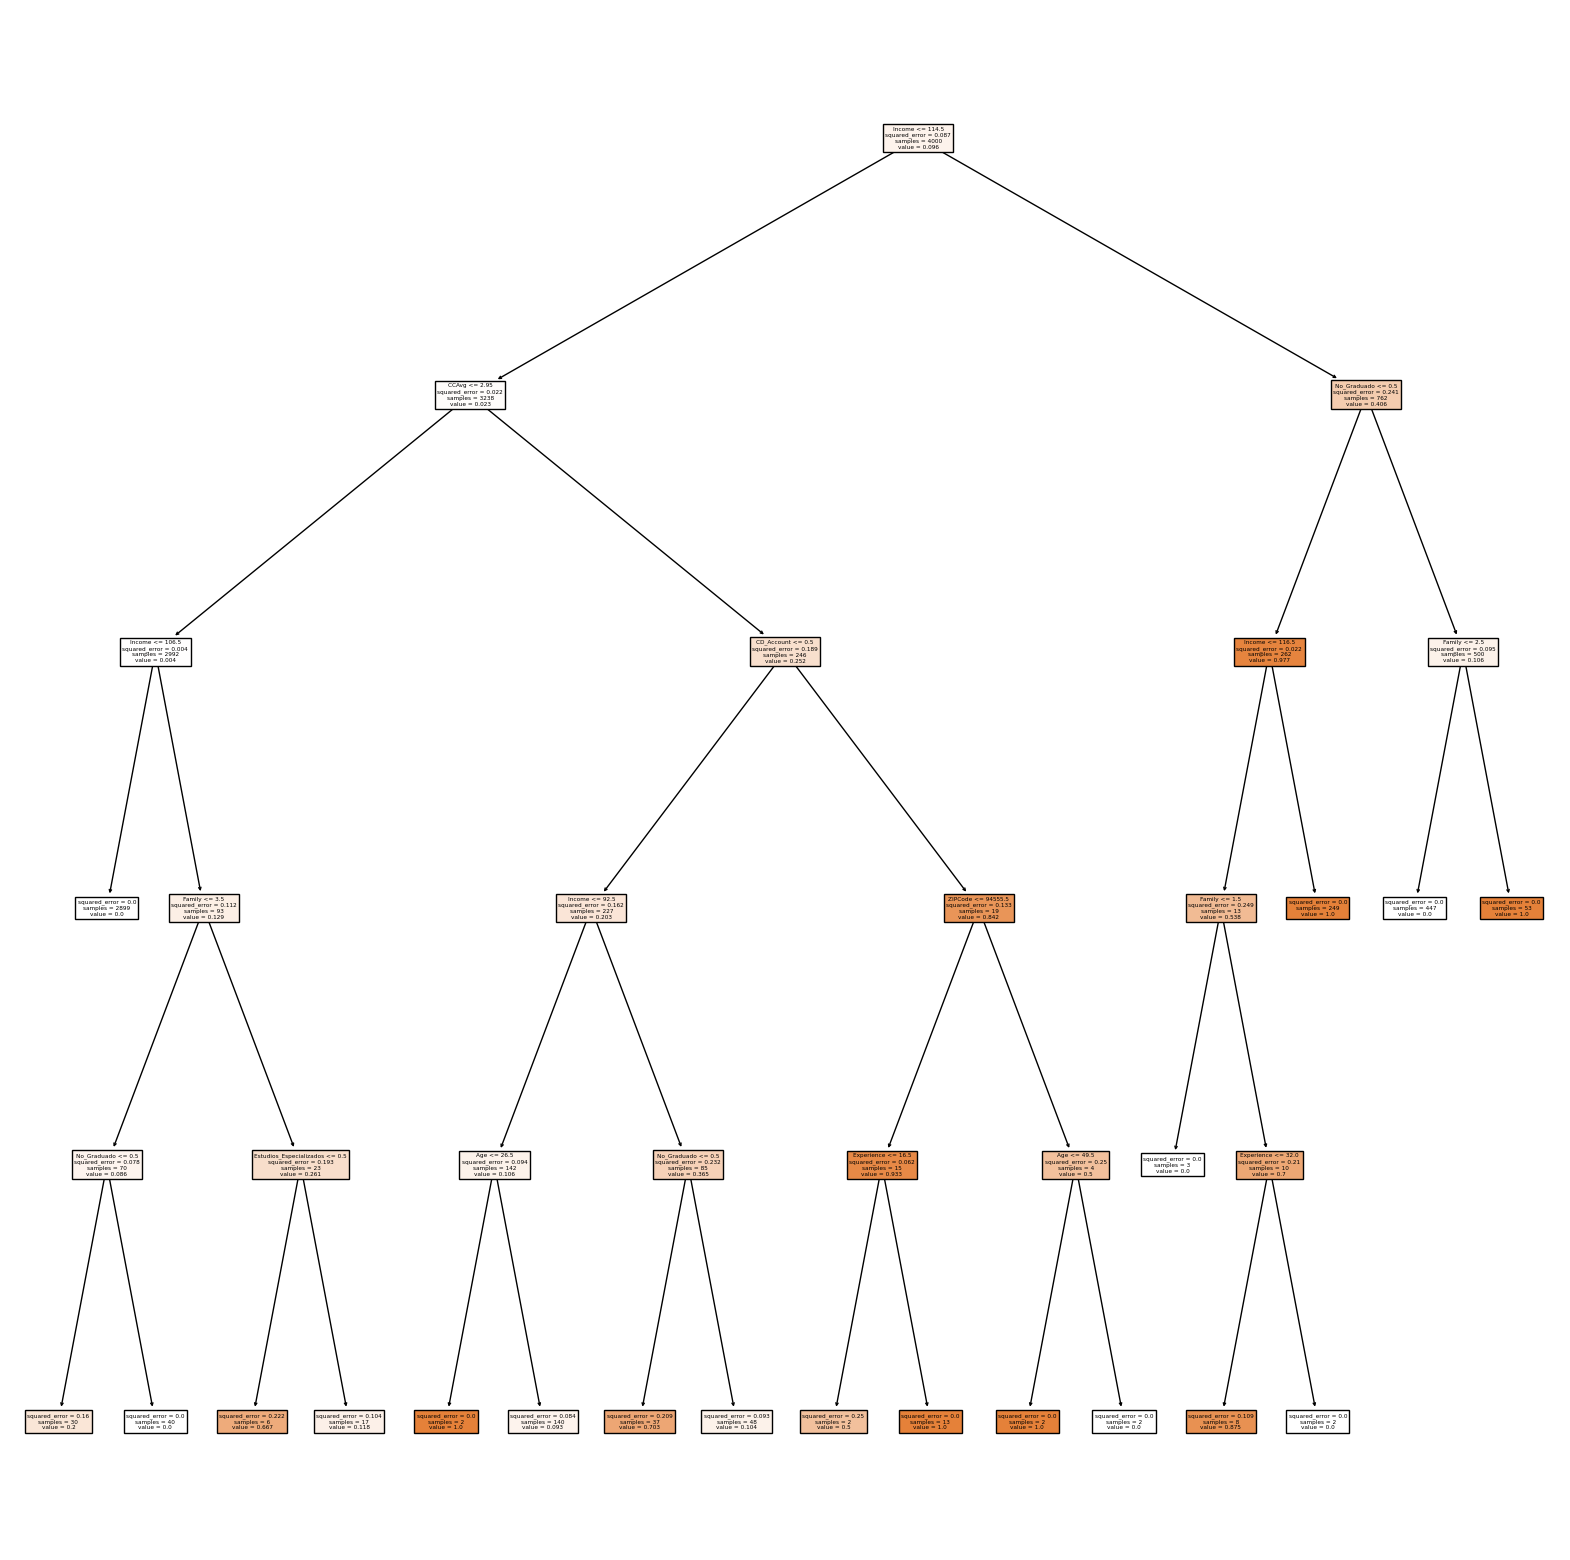

In [68]:
from sklearn.tree import plot_tree

# Asegúrate de que estás utilizando el modelo con los mejores parámetros encontrados por GridSearchCV
mejor_modelo = busqueda_cuadricula.best_estimator_

fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(mejor_modelo, filled=True, feature_names=X.columns, class_names=['No acepta', 'Acepta'], ax=ax)
plt.show()